In [1]:
import sys
sys.path.append("../../direct")
from trajectory import orbit2orbit
import pygmo as pg
import pygmo_plugins_nonfree as pg7
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
%matplotlib notebook

In [2]:
udp = orbit2orbit(nseg=50, mass=1000, tmax=0.05, isp=2500)
prob = pg.problem(udp)
prob.c_tol = [1e-6]*(7 + udp.nseg)
print(prob)

Problem name: <class 'trajectory.orbit2orbit'>
	Global dimension:			154
	Integer dimension:			0
	Fitness dimension:			58
	Number of objectives:			1
	Equality constraints dimension:		7
	Inequality constraints dimension:	50
	Tolerances on constraints: [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, ... ]
	Lower bounds: [200, 100, 0, 0, -1, ... ]
	Upper bounds: [3000, 1000, 6.28319, 6.28319, 1, ... ]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [3]:
uda = pg7.snopt7(True, "/usr/lib/libsnopt7_c.so")
uda.set_integer_option("Major iterations limit", 4000)
uda.set_integer_option("Iterations limit", 20000)
uda.set_numeric_option("Major optimality tolerance", 1e-3)
uda.set_numeric_option("Major feasibility tolerance", 1e-10)
algo = pg.algorithm(uda)
#uda = pg.mbh(algo, 5, 0.5)
#algo = pg.algorithm(uda)

In [4]:
pop = pg.population(prob, 1)

In [5]:
pop = algo.evolve(pop)

In [6]:
print(prob.feasibility_x(pop.champion_x))

True


<IPython.core.display.Javascript object>


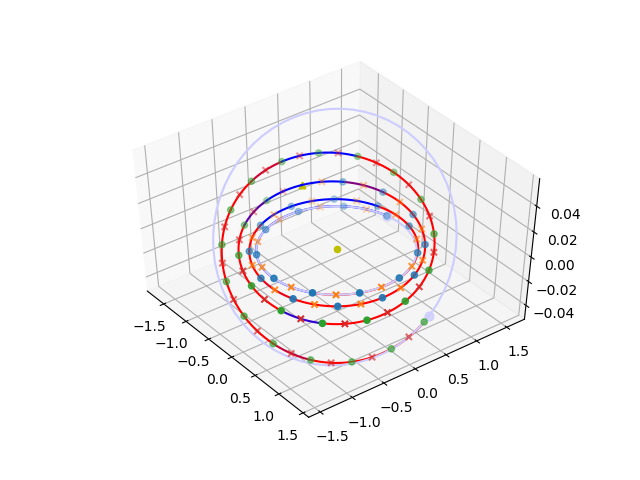

In [9]:
udp.plot_traj(pop.champion_x)

array([  1.71631723e+03,   7.90377323e+02,   6.28318531e+00,
         5.90988733e-01,  -2.99461856e-04,  -1.70803564e-04,
         2.77534983e-05,  -1.76455038e-05,  -3.67319344e-05,
        -7.05000325e-06,   7.96311143e-06,  -5.61052912e-05,
        -1.38432318e-05,   1.52252254e-03,  -1.65162133e-03,
        -6.00087413e-04,   1.24547392e-02,  -2.98729329e-03,
        -2.96285082e-03,   7.82739646e-02,   2.82897609e-02,
        -9.97854067e-03,   6.03014468e-01,   7.97317646e-01,
         2.56539053e-02,   7.01614543e-02,   9.85306499e-01,
         1.55719215e-01,  -4.71131298e-01,   8.51556059e-01,
         2.29972997e-01,  -8.58389736e-01,   4.57875399e-01,
         2.31337808e-01,  -9.83934023e-01,  -7.90774487e-02,
         1.60064347e-01,  -4.85697761e-05,  -3.54865014e-05,
        -8.47006952e-07,  -1.47669441e-05,  -3.92458880e-05,
        -3.73475499e-06,   3.13773643e-05,  -2.06158895e-04,
        -4.91538472e-05,   6.06491237e-01,  -7.45842838e-01,
        -2.75475662e-01,